In [517]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [272]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [26]:
#zhi_df=pd.read_csv('Zip_Zri_AllHomesPlusMultifamily.csv')

In [27]:
# zhi_df=zhi_df.reset_index()
# zhi_df_tmp=zhi_df.drop(['RegionID','RegionName','City','State','Metro','CountyName','SizeRank'],axis=1)
# zhi_df_pivot=pd.DataFrame(zhi_df_tmp.stack())
# zhi_df_pivot=zhi_df_pivot[1:].reset_index()
# zhi_df_pivot.columns=['index','Date','Value']
# zhi_reshaped=zhi_df_pivot.merge(zhi_df[['index','RegionID','RegionName','City','State','Metro','CountyName','SizeRank']],on='index')
# zhi_reshaped=zhi_reshaped.drop('index',axis=1)

# Merging ACS Data 

In [62]:
ls


ACS_data/
Top_100.xlsx
ZRI and ACS .ipynb
Zip_Zri_AllHomesPlusMultifamily.csv
Zip_Zri_MultiFamilyResidenceRental (1).csv
acs_5yr_merged.csv
jrfm-13-00161-v2.pdf
~$Top_100.xlsx


In [87]:
# assign path
path, dirs, files = next(os.walk("./ACS_data/"))
file_count = len(files)
# create empty list
dataframes_list = []
  
# append datasets to the list 
for i in range(file_count):
    temp_df = pd.read_csv("./ACS_data/"+files[i])
    dataframes_list.append(temp_df)
      



In [128]:
# display datsets
for dataset in dataframes_list:
    print(dataset.do_date.unique())
    print(dataset.shape)
    #print(dataset.columns.to_list())
    print('\n')

    

[20092013]
(33120, 252)


[20112015]
(33120, 247)


[20102014]
(33120, 252)


[20072011]
(33120, 252)


[20082012]
(33120, 252)


['2014-01-01']
(33120, 240)


[20122016]
(33120, 252)


[20132017]
(33120, 252)




In [523]:
#set(dataframes_list[0].columns)

In [573]:
#Columns to drop from 2018 (none)
(set(dataframes_list[5].columns) - set(dataframes_list[5].columns))

set()

In [574]:
#Columns to drop from 2011, 2012,2013, 2014, 2016, 2017 (same columns)
(set(dataframes_list[7].columns) - set(dataframes_list[5].columns))

{'amerindian_including_hispanic',
 'asian_including_hispanic',
 'black_including_hispanic',
 'commute_35_39_mins',
 'commute_40_44_mins',
 'commute_5_9_mins',
 'commute_60_89_mins',
 'commute_90_more_mins',
 'households_retirement_income',
 'male_60_61',
 'male_62_64',
 'white_including_hispanic'}

In [577]:
#Columns to drop from 2015
#In 2015 and not in 2018 
(set(dataframes_list[1].columns) - set(dataframes_list[5].columns))

{'amerindian_including_hispanic',
 'asian_including_hispanic',
 'black_including_hispanic',
 'commute_35_39_mins',
 'commute_40_44_mins',
 'commute_5_9_mins',
 'commute_60_89_mins',
 'commute_90_more_mins',
 'geoid',
 'households_retirement_income',
 'male_60_61',
 'male_62_64',
 'white_including_hispanic'}

In [580]:
#In 2018 and all other years except 2015 - remove from 2011, 2012, 2013, 2014, 2016,2017 
(set(dataframes_list[5].columns) - set(dataframes_list[1].columns))

{'pop_15_and_over',
 'pop_divorced',
 'pop_never_married',
 'pop_now_married',
 'pop_separated',
 'pop_widowed'}

amerindian_including_hispanic,
asian_including_hispanic,
black_including_hispanic,
commute_35_39_mins,
commute_40_44_mins,
commute_5_9_mins,
commute_60_89_mins,
commute_90_more_mins,
geoid,
households_retirement_income,
male_60_61,
male_62_64,
white_including_hispanic,
pop_15_and_over,
pop_divorced,
pop_never_married,
pop_now_married,
pop_separated,
pop_widowed

In [149]:
#2013, 2014, 2011, 2012, 2016, 2017 have same columns 
print((set(dataframes_list[0].columns) == set(dataframes_list[2].columns)))
print((set(dataframes_list[0].columns) == set(dataframes_list[3].columns)))
print((set(dataframes_list[0].columns) == set(dataframes_list[4].columns)))
print((set(dataframes_list[0].columns) == set(dataframes_list[6].columns)))
print((set(dataframes_list[0].columns) == set(dataframes_list[7].columns)))

True
True
True
True
True


In [154]:
for i in range(len(dataframes_list)):
    temp = dataframes_list[i]
    temp.head()
    

In [180]:
#concatenate all dataframes (will automatically drop nonoverlapping columns)
acs_df = pd.concat(dataframes_list)


In [184]:
set(acs_df.columns) - set(dataframes_list[0].columns)

{'geoid'}

In [183]:
acs_df['geoid'].isna().sum()

264960

In [185]:
acs_df.shape

(264960, 253)

In [186]:
acs_df = acs_df.drop('geoid',axis='columns')

In [187]:
acs_df.shape

(264960, 252)

In [226]:
acs_df['do_date'].unique()

array([20092013, 20112015, 20102014, 20072011, 20082012, 20142018,
       20122016, 20132017], dtype=object)

In [227]:
acs_df.loc[acs_df['do_date']=='2014-01-01','do_date'] = 20142018

In [228]:
acs_df['do_date'].unique()

array([20092013, 20112015, 20102014, 20072011, 20082012, 20142018,
       20122016, 20132017], dtype=object)

In [229]:
acs_df = acs_df.sort_values(by='do_date',axis=0)

In [230]:
acs_df['do_date'].unique()

array([20072011, 20082012, 20092013, 20102014, 20112015, 20122016,
       20132017, 20142018], dtype=object)

In [594]:
acs_merged = pd.read_csv('acs_5yr_merged.csv',dtype = {'geo_id': str, 'do_date': int})
acs_merged.shape

(264960, 252)

In [654]:
#Check out new merged file with zip code casted as string 
acs_niki_merged = pd.read_csv('bq-results-merged-zip.csv',dtype = {'geo_id': str, 'do_date': int})
print(acs_niki_merged.shape)
print((acs_niki_merged['geo_id'].map(lambda x: len(x))<5).sum())
print((acs_merged['geo_id'].map(lambda x: len(x))<5).sum())
print(min(acs_niki_merged['geo_id']))
print(min(acs_merged['geo_id']))
acs_niki_merged['geo_id'][acs_niki_merged['geo_id'].map(lambda x: x.endswith("0") or x.startswith("0"))]

(264960, 234)
0
20464
00601
10001


5         99160
36        54010
54        46930
59        21540
75        81640
          ...  
264935    72030
264945    07976
264950    16260
264955    01921
264958    02061
Name: geo_id, Length: 46512, dtype: object

In [233]:
set(acs_df.columns)-set(acs_merged.columns)

set()

In [656]:
(acs_merged.isna().sum()/264960*100)

geo_id                                                             0.000000
do_date                                                            0.000000
nonfamily_households                                               0.000000
family_households                                                  0.000000
median_year_structure_built                                        2.630208
rent_burden_not_computed                                           0.013210
rent_over_50_percent                                               0.013210
rent_40_to_50_percent                                              0.013210
rent_35_to_40_percent                                              0.013210
rent_30_to_35_percent                                              0.013210
rent_25_to_30_percent                                              0.013210
rent_20_to_25_percent                                              0.013210
rent_15_to_20_percent                                              0.013210
rent_10_to_1

In [342]:
#2014-2018 dataset
df = acs_merged[acs_merged['do_date']==20142018]

In [333]:
df.shape

(33120, 252)

In [334]:
df.head()

,geo_id,do_date,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,male_pop,female_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,not_hispanic_pop,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_60_61,male_62_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,civilian_labor_force,employed_pop,unemployed_pop,not_in_labor_force,pop_16_over,pop_in_labor_force,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail

# SQL EXERCISES 

In [335]:
# # SQL EXERCISE 1

# # Using data from the American Community Survey 2018 (ACS 5 Year 2018), 
# identify the mean, median, and skew of income in the united states.
# Then do the same for the states New York, California, Texas, and Florida. 
# The output should be graph of a ranked national percentile for each state 
# where the Y-axis is the income level, and the X-axis is the percentile.
# E.g. 90th percentile of income for NY is $150,000 and it’s $110,000 for 
# Florida etc. You can check your work by googling similar bar charts (pretty common).

 

# # SQL EXERCISE 2

# # Join two data tables together – the ACS tables are broken up by year. 
# Create a time series from 2013-2018 of data, and compute the same metrics from 
# SQL EXERCISE 1 as a growth rate. E.g. “How has the distribution of income
# changed over time in the states listed above?”

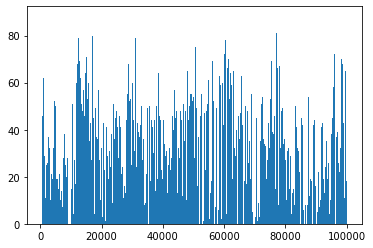

In [336]:
g = plt.hist(df['geo_id'],bins=1000)

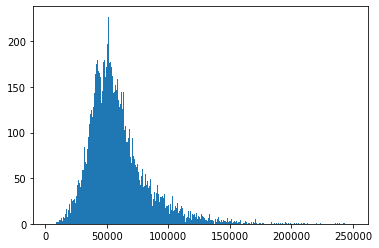

In [337]:
g = plt.hist(df['median_income'],bins=1000)

In [291]:
df.duplicated('geo_id').sum()

0

In [292]:
df.shape

(33120, 252)

In [294]:
len(df['geo_id'].unique())

33120

In [295]:
#There are 33,120 different zip codes, no need to group by ... 

**Geo ID**:
US Census Zip Code Tabulation Areas Geoids

**Median Income**:
Median Household Income in the past 12 Months. Within a geographic area, the median income received by every household on a regular basis before payments for personal income taxes, social security, union dues, medicare deductions, etc. 

**Income Per Capita**:
Per Capita Income in the past 12 Months. Per capita income is the mean income computed for every man, woman, and child in a particular group. It is derived by dividing the total income of a particular group by the total population.

**Total Population**:
The total number of all people living in a given geographic area. This is a very useful catch-all denominator when calculating rates.

In [351]:
#2014-2018 dataset
df = acs_merged[acs_merged['do_date']==20142018]
df[['geo_id','median_income','income_per_capita','total_pop']].isna().sum()
df2018 = df.dropna(axis=0,subset=['geo_id','median_income','income_per_capita','total_pop'])
df2018[['geo_id','median_income','income_per_capita','total_pop']].isna().sum()

geo_id               0
median_income        0
income_per_capita    0
total_pop            0
dtype: int64

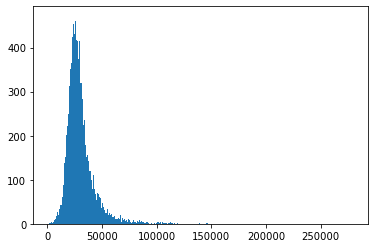

In [365]:
g = plt.hist(df2018['income_per_capita'],bins=1000)

In [ ]:
#population of USA is around 328,000,000 
usa_total_pop = df2018['total_pop'].sum()
#Take weighted average of income per capita instead of average of the income per capita values 
print(f"Mean income USA: {round(sum(df2018['income_per_capita'] * (df2018['total_pop'] / usa_total_pop)),2)}")
print(f"Median income USA: {df2018['income_per_capita'].median()}")
print(f"Skew of income USA: {df2018['income_per_capita'].skew()}")

In [380]:
#Get zip to county and state mapping
zipmap = pd.read_csv('ZIP_COUNTY_062021.csv')

In [382]:
df_county = pd.merge(df,zipmap,how='left',left_on='geo_id',right_on='zip')

In [384]:
df.shape

(33120, 252)

In [390]:
df_county.shape

(47847, 260)

In [391]:
zipmap.duplicated('zip').sum()

14764

In [423]:
#Note there are duplicates in the merge --> 1 zip code can belong to multiple counties 
# When a ZIP is split by any of the other geographies, that ZIP code is duplicated in the crosswalk file. 
# In the example below, ZIP code 03870 is split by two different Census tracts, 33015066000 and 33015071000,
# which appear in the tract column. The ratio of residential addresses in the first ZIP-Tract record to the 
# total number of residential addresses in the ZIP code is .0042 (.42%). 
# The remaining residential addresses in that ZIP (99.58%) fall into the second ZIP-Tract record. 
# So, for example, if one wanted to allocate data from ZIP code 03870 to each Census tract located 
# in that ZIP code, one would multiply the number of observations in the ZIP code by the residential 
# ratio for each tract associated with that ZIP code. Note that the sum of each ratio column for 
# each distinct ZIP code may not always equal 1.00 (or 100%) due to rounding issues.

#Better to use it as a lookup table / dictionary rather than merged 

In [422]:
#Create dictionary with State as keys and associated zips as values 
zipmap = pd.read_csv('ZIP_COUNTY_062021.csv')
state_to_zip_dict = dict(zipmap.groupby('usps_zip_pref_state')['zip'].unique())
state_to_zip_dict['NY']

array([  501,  6390, 10001, ..., 14903, 14904, 14905])

# QUESTION 1 

In [418]:
#population of USA is around 328,000,000 
usa_total_pop = df2018['total_pop'].sum()
#Take weighted average of income per capita instead of average of the income per capita values 
print(f"Mean income USA: {round(sum(df2018['income_per_capita'] * (df2018['total_pop'] / usa_total_pop)),2)}")
print(f"Median income USA: {df2018['income_per_capita'].median()}")
print(f"Skew of income USA: {df2018['income_per_capita'].skew()}")

Mean income USA: 32454.97
Median income USA: 27435.0
Skew of income USA: 2.737365729091282


(1644, 252)
Mean income NY: 37532.64
Median income NY: 30984.5
Skew of income NY: 2.641211501179423


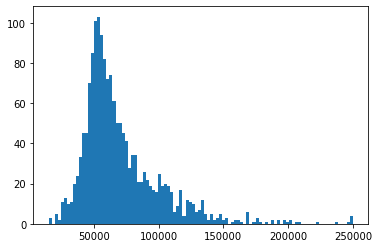



(1626, 252)
Mean income CA: 35049.17
Median income CA: 31627.5
Skew of income CA: 1.7269130291839812


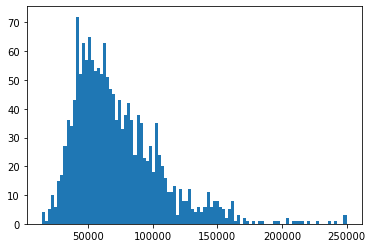



(1787, 252)
Mean income TX: 30167.09
Median income TX: 25850.0
Skew of income TX: 3.360385910901673


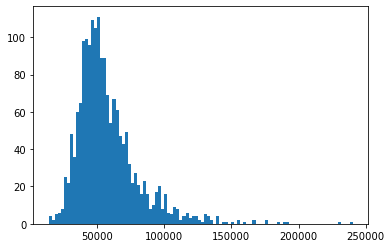



(938, 252)
Mean income FL: 30223.57
Median income FL: 27206.0
Skew of income FL: 5.225024585187345


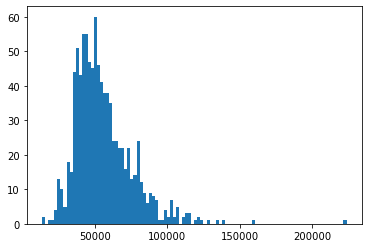

In [421]:
states = ['NY','CA','TX','FL']
for s in states:
    state_df = df2018[df2018['geo_id'].isin(state_to_zip_dict[s])]
    print(state_df.shape)
    
    #state total population
    state_total_pop = state_df['total_pop'].sum()
    #Take weighted average of income per capita instead of average of the income per capita values 
    print(f"Mean income {s}: {round(sum(state_df['income_per_capita'] * (state_df['total_pop'] / state_total_pop)),2)}")
    print(f"Median income {s}: {state_df['income_per_capita'].median()}")
    print(f"Skew of income {s}: {state_df['income_per_capita'].skew()}")
    g = plt.hist(state_df['median_income'],bins=100)
    plt.show()
    print('\n')
    

# QUESTION 2 

In [431]:
acs_merged['do_date'].unique()

array([20072011, 20082012, 20092013, 20102014, 20112015, 20122016,
       20132017, 20142018])

In [432]:
#20092013 dataset
df2013 = acs_merged[acs_merged['do_date']==20092013]
#20102014 dataset
df2014 = acs_merged[acs_merged['do_date']==20102014]
#20112015 dataset
df2015 = acs_merged[acs_merged['do_date']==20112015]
#20122016 dataset
df2016 = acs_merged[acs_merged['do_date']==20122016]
#20132017 dataset
df2017 = acs_merged[acs_merged['do_date']==20132017]
#already have this: df2018 = acs_merged[acs_merged['do_date']==20142018]


Data for State: NY


,Year,Mean,Median,Skew
0,2013.0,32438.11,27403.0,2.755759
1,2014.0,32886.04,27845.0,2.781355
2,2015.0,33293.49,28091.0,2.927585
3,2016.0,34269.40,28603.5,2.787598
4,2017.0,35817.42,29762.0,2.745667
5,2018.0,37532.64,30984.5,2.641212


State NY: Growth Rate as YOY percent change in metric


,Year,Mean_YOY_Growth,Median_YOY_Growth,Skew_YOY_Growth
0,2013,0.000000,0.000000,0.000000
1,2014,1.380876,1.612962,0.928814
2,2015,1.238976,0.883462,5.257502
3,2016,2.931234,1.824428,-4.781660
4,2017,4.517208,4.050204,-1.504199
5,2018,4.788787,4.107587,-3.804359


State NY: Mean, Median, Skew Metrics (1) and YOY Growth Rate (2) 


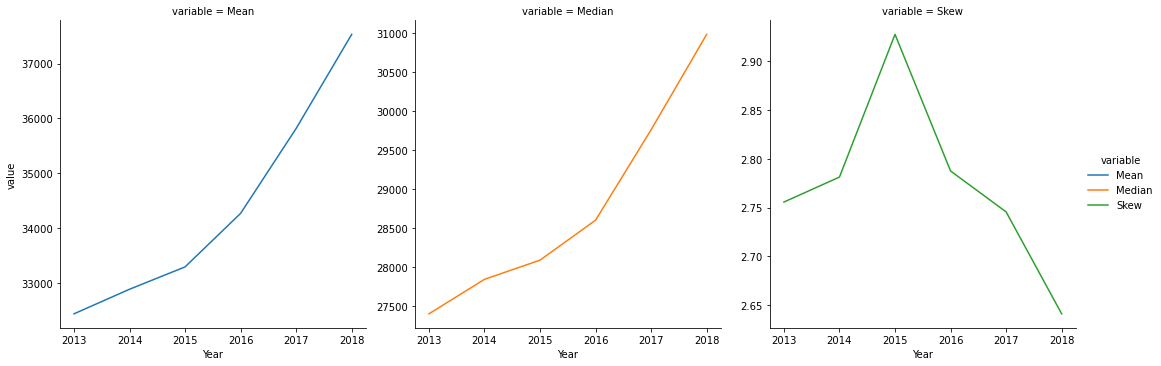

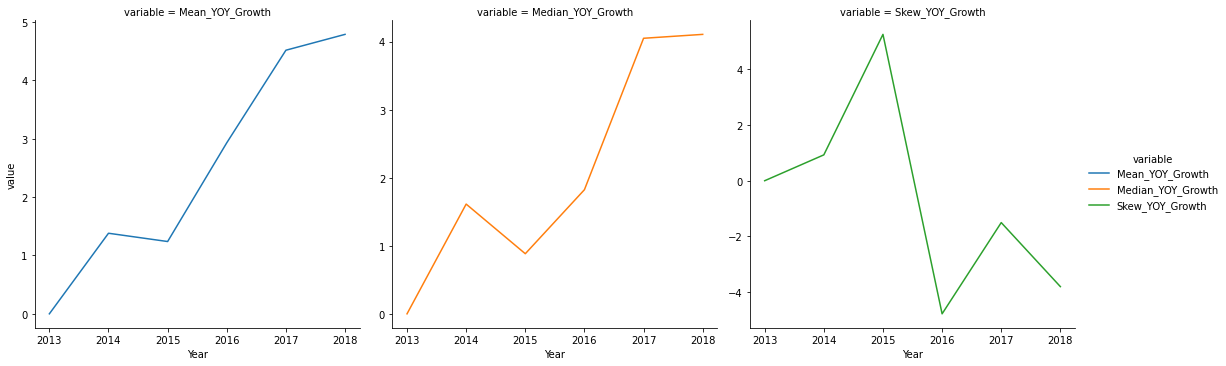

Data for State: CA


,Year,Mean,Median,Skew
0,2013.0,29542.18,26762.0,2.000887
1,2014.0,29919.04,27047.0,1.920293
2,2015.0,30338.02,27392.0,1.898373
3,2016.0,31480.88,28490.0,1.923902
4,2017.0,33154.99,29919.5,1.852177
5,2018.0,35049.17,31627.5,1.726913


State CA: Growth Rate as YOY percent change in metric


,Year,Mean_YOY_Growth,Median_YOY_Growth,Skew_YOY_Growth
0,2013,0.000000,0.000000,0.000000
1,2014,1.275668,1.064943,-4.027951
2,2015,1.400379,1.275557,-1.141498
3,2016,3.767088,4.008470,1.344793
4,2017,5.317863,5.017550,-3.728088
5,2018,5.713107,5.708652,-6.763065


State CA: Mean, Median, Skew Metrics (1) and YOY Growth Rate (2) 


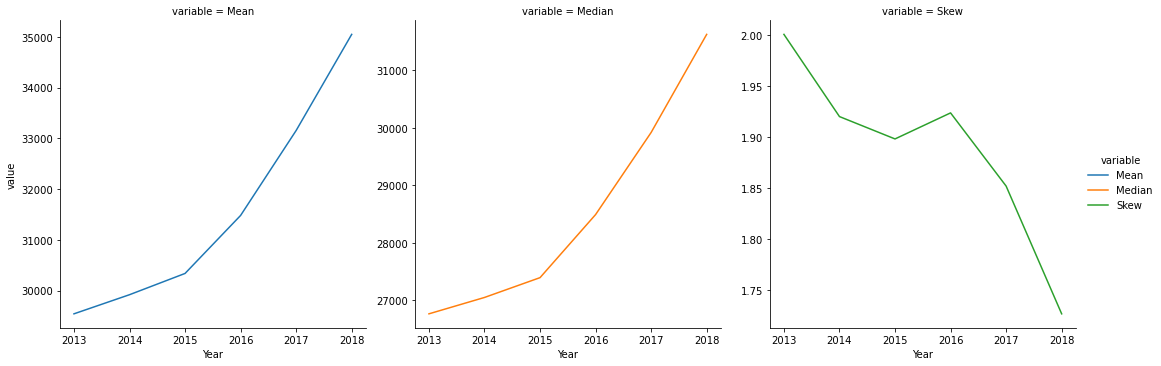

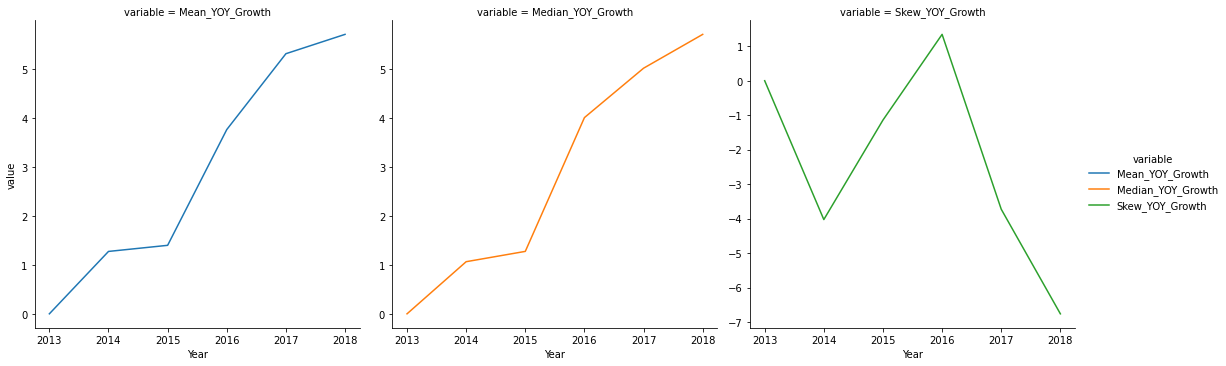

Data for State: TX


,Year,Mean,Median,Skew
0,2013.0,26039.09,22797.0,3.650771
1,2014.0,26533.15,23244.0,3.256782
2,2015.0,27022.81,23736.0,3.155112
3,2016.0,27853.67,24257.0,3.498729
4,2017.0,29012.41,25122.5,3.220785
5,2018.0,30167.09,25850.0,3.360386


State TX: Growth Rate as YOY percent change in metric


,Year,Mean_YOY_Growth,Median_YOY_Growth,Skew_YOY_Growth
0,2013,0.000000,0.000000,0.000000
1,2014,1.897378,1.960784,-10.791935
2,2015,1.845465,2.116675,-3.121788
3,2016,3.074662,2.194978,10.890796
4,2017,4.160098,3.568042,-7.944139
5,2018,3.979952,2.895811,4.334365


State TX: Mean, Median, Skew Metrics (1) and YOY Growth Rate (2) 


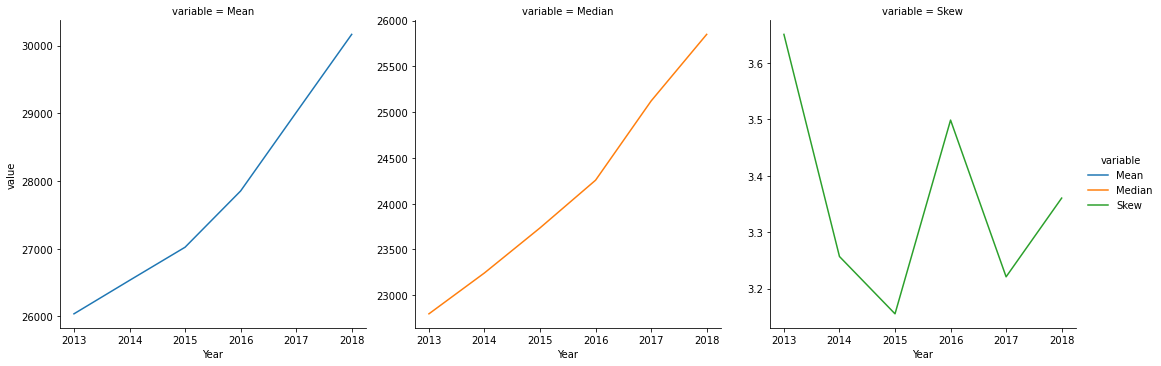

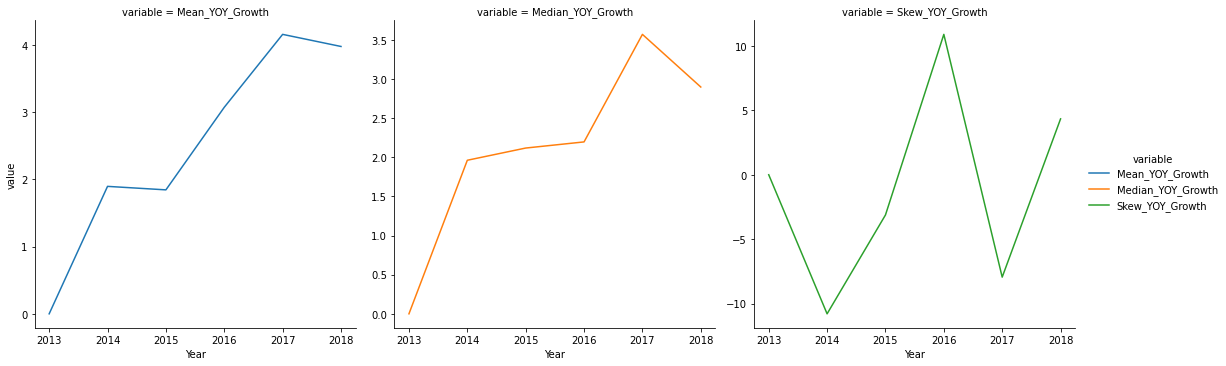

Data for State: FL


,Year,Mean,Median,Skew
0,2013.0,26255.77,23872.0,2.201082
1,2014.0,26519.94,24011.0,3.727312
2,2015.0,26857.09,24060.0,3.784051
3,2016.0,27624.89,24885.0,3.833842
4,2017.0,28798.03,25798.0,4.893456
5,2018.0,30223.57,27206.0,5.225025


State FL: Growth Rate as YOY percent change in metric


,Year,Mean_YOY_Growth,Median_YOY_Growth,Skew_YOY_Growth
0,2013,0.000000,0.000000,0.000000
1,2014,1.006141,0.582272,69.339958
2,2015,1.271308,0.204073,1.522254
3,2016,2.858835,3.428928,1.315811
4,2017,4.246678,3.668877,27.638429
5,2018,4.950130,5.457787,6.775760


State FL: Mean, Median, Skew Metrics (1) and YOY Growth Rate (2) 


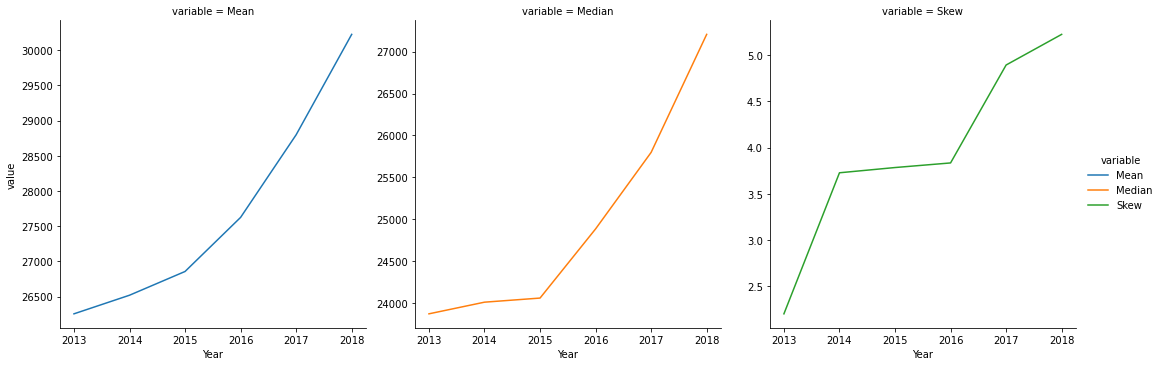

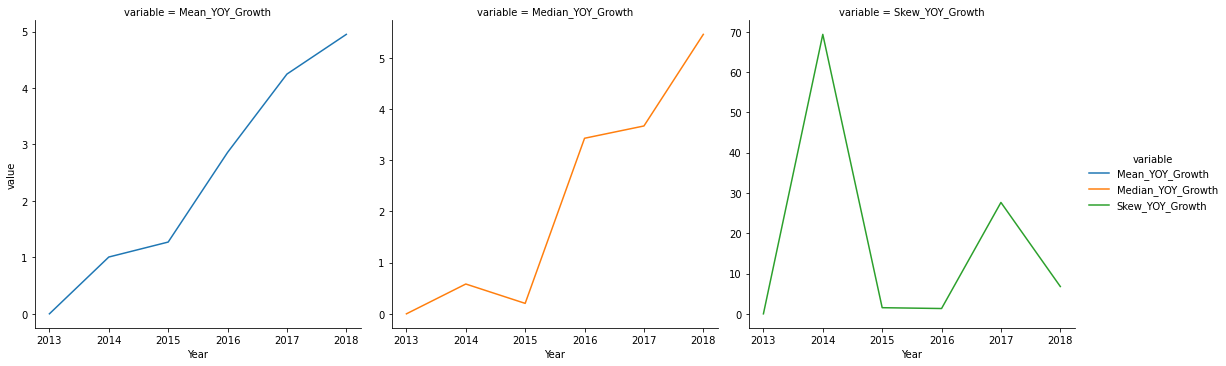

In [518]:
states = ['NY','CA','TX','FL']
for s in states:
    state_allyears = acs_merged[acs_merged['geo_id'].isin(state_to_zip_dict[s])]
    state_allyears = state_allyears.dropna(axis=0,subset=['geo_id','median_income','income_per_capita','total_pop'])

    years = np.arange(2013,2019)
    means = []
    medians = []
    skews = []
    for y in [20092013, 20102014, 20112015, 20122016, 20132017, 20142018]:
        temp = state_allyears[state_allyears['do_date']==y]
        #state total population
        temp_total_pop = temp['total_pop'].sum()
        #Take weighted average of income per capita
        means.append(round(sum(temp['income_per_capita'] * (temp['total_pop'] / temp_total_pop)),2))
        medians.append(temp['income_per_capita'].median())
        skews.append(temp['income_per_capita'].skew())
    state_stats = pd.DataFrame([years, means, medians, skews]).T
    state_stats.columns = ['Year','Mean','Median','Skew']
    #state_stats.set_index('Year',inplace=True)
    print(f"Data for State: {s}")
    display(state_stats)
    print(f"State {s}: Growth Rate as YOY percent change in metric")
    state_gr = state_stats.pct_change()*100
    state_gr.columns = ['Year','Mean_YOY_Growth','Median_YOY_Growth','Skew_YOY_Growth']
    state_gr['Year'] = state_stats['Year'].astype(int)
    state_gr.fillna(0,inplace=True)
    display(state_gr)
    print(f"State {s}: Mean, Median, Skew Metrics (1) and YOY Growth Rate (2) ")
    g = sns.relplot(x="Year", y="value", hue="variable",kind='line',
                col="variable", data=pd.melt(state_stats, ['Year']),facet_kws={'sharey': False, 'sharex': True})
    
    plt.show()
    g = sns.relplot(x="Year", y="value", hue="variable",kind='line',
                col="variable", data=pd.melt(state_gr, ['Year']),facet_kws={'sharey': False, 'sharex': True})
    
    plt.show()
    
    
    
    
    

In [660]:
#zip assoicated with cbsa "Albany-Schenectady-Troy, NY"
zipmap[zipmap['county']==36001]['usps_zip_pref_city'].unique()

array(['ALCOVE', 'ALTAMONT', 'BERNE', 'CLARKSVILLE', 'COEYMANS',
       'COEYMANS HOLLOW', 'COHOES', 'DELANSON', 'DELMAR', 'DORMANSVILLE',
       'EAST BERNE', 'CLIFTON PARK', 'FEURA BUSH', 'GLENMONT',
       'GREENVILLE', 'GUILDERLAND', 'GUILDERLAND CENTER', 'HANNACROIX',
       'KNOX', 'LATHAM', 'MEDUSA', 'MIDDLEBURGH', 'NEWTONVILLE', 'RAVENA',
       'RENSSELAERVILLE', 'SCHOHARIE', 'SELKIRK', 'SLINGERLANDS',
       'SOUTH BETHLEHEM', 'TROY', 'VOORHEESVILLE', 'WATERVLIET',
       'WESTERLO', 'ALBANY', 'SCHENECTADY', 'OAK HILL', 'PRESTON HOLLOW'],
      dtype=object)